In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [3]:
path = '/Users/homanchan/.kaggle/data/'

model_matrix = pd.read_parquet(path + 'model_dataset.parquet', engine='pyarrow')

if model_matrix.empty:
    print("Fail to load model matrix.")
else:
    print("Model matrix is loaded successfully.")

Model matrix is loaded successfully.


In [4]:
# Fit PCA without limiting n_components
pca = PCA()
pca.fit(model_matrix)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


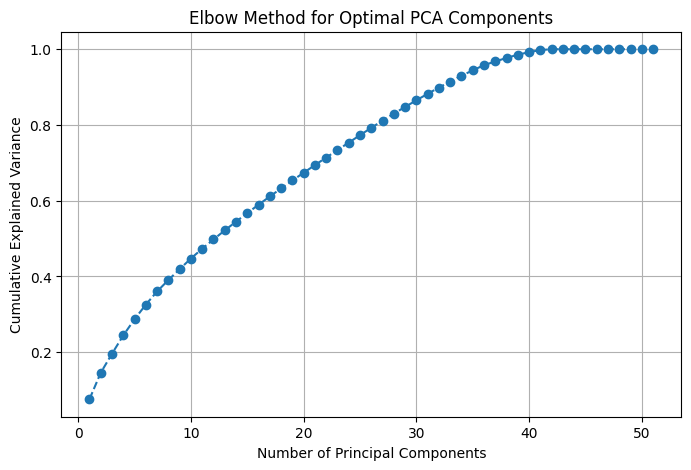

In [ ]:
# Plot cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

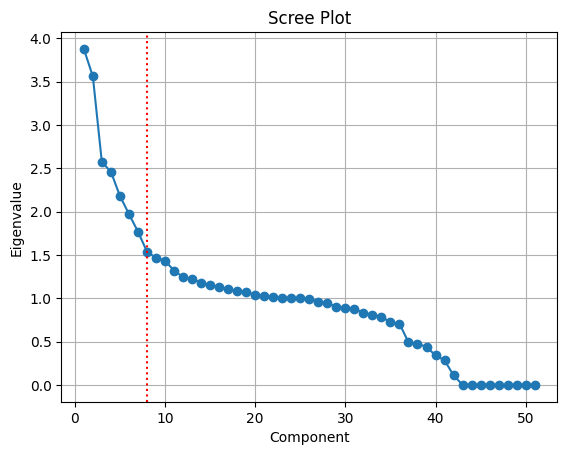

In [9]:
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.axvline(x=8, color='r', linestyle=':')
plt.show()

In [13]:
# Apply PCA
pca = PCA(n_components=8)  # Reduce to 8 principal components
X_pca = pca.fit_transform(model_matrix)